In [1]:
from sequence_for_nn import *

In [2]:
container = Container()
container.read_seq("../data/myco_genome.fasta", "fasta")
container.cut_seq(length = 100, start = 0)
container.generate_seq()

container created
read seq from file ../data/myco_genome.fasta, length = 4399916
cuted seq for analysis, length = 100, start = 0, part = 0.0-0.0
generated seq_np


In [3]:
inp = np.random.rand(4, 100)
end = container.seq_np
print(inp.shape)
print(end.shape)

(4, 100)
(4, 100)


In [4]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D
from keras import backend as K

Using TensorFlow backend.


In [5]:
input_shape = (4, 100) #batch, steps, channels

In [7]:
model = Sequential()
model.add(Conv1D(32, kernel_size= 3,
                 activation='relu',
                 input_shape=input_shape))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
model.add(UpSampling1D(size = 3))

In [8]:
model.compile(optimizer='adam', loss='mse')

# 2D with pics

In [1]:
# from PIL import Image
import numpy as np
import math
# import IPython
import matplotlib.pyplot as plt
%matplotlib inline

(64, 64, 3)
(10, 64, 64, 3)


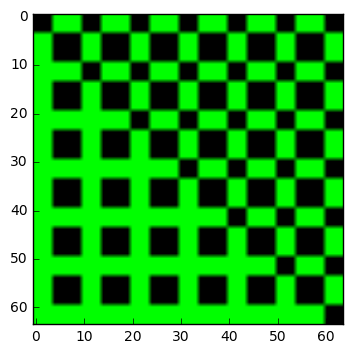

In [27]:
length = 64
array = np.zeros((length, length, 3))

for line in range(0, length, 10):
    array[line:line+4, :, 1] = 1
    array[:, line:line+4, 1] = np.abs(array[:, line:line+4, 1] - 1)
print(array.shape)

array_image = (array * 255).astype(np.uint8)
#image = Image.fromarray(array_image)
# image.show()
imgplot = plt.imshow(array_image)
# IPython.display.display(IPython.display.Image(image))

array_10 = np.array([array for i in range(10)])
print(array_10.shape)

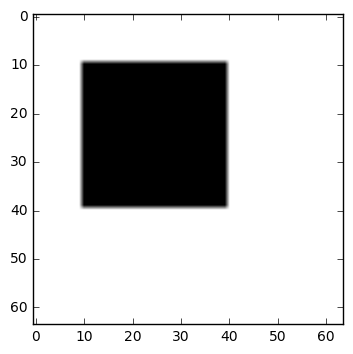

In [28]:
mask = np.zeros((length, length, 3))
mask.fill(1)
for line in range(10, 40):
    mask[line, 10:40, :] = 0
    
mask_image = (mask * 255).astype(np.uint8)
# image = Image.fromarray(mask_image)
# image.show()
imgplot = plt.imshow(mask_image)

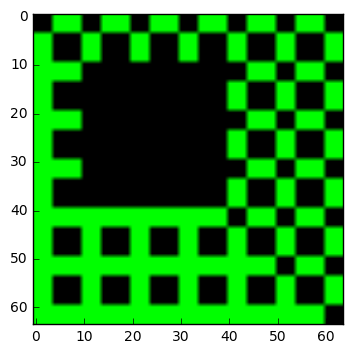

In [29]:
masked_image = (array * mask * 255).astype(np.uint8)
# image = Image.fromarray(masked_image)
# image.show()
imgplot = plt.imshow(masked_image)

In [30]:
inp = np.random.rand(length, length, 32)
print(inp.shape)

# for i in np.nditer(inp):
#     i = math.trunc(i * 255)
# image = Image.fromarray(inp.astype(np.uint8))
# image.show()
inp_10 = np.array([inp for i in range(10)])
print(inp_10.shape)

(64, 64, 32)
(10, 64, 64, 32)


In [31]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Dense, Concatenate, concatenate
from keras.layers import Input, Dense
from keras.models import Model

In [52]:
input_shape = (length, length, 32)

input_img = Input(shape=(length, length, 32))
x1 = Conv2D(16, (4, 4), activation='relu', padding='same')(input_img)
x1 = MaxPooling2D((2, 2), padding='same')(x1) # x1 (64, 64, 16)

x2 = Conv2D(8, (4, 4), activation='relu', padding='same')(x1)
x2 = MaxPooling2D((2, 2), padding='same')(x2) # x2 (32, 32, 8)

x3 = Conv2D(8, (4, 4), activation='relu', padding='same')(x2)
x3 = MaxPooling2D((2, 2), padding='same')(x3) #x3 (16, 16, 8)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional


x97 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
x97 = UpSampling2D((2, 2))(x97) #x97 (32, 32, 8)

x98 = Conv2D(8, (3, 3), activation='relu', padding='same')(concatenate([x97, x2]))
x98 = UpSampling2D((2, 2))(x98) # x98 (64, 64, 8)

x99 = Conv2D(16, (3, 3), activation='relu', padding = "same")(concatenate([x98, x1]))
x99 = UpSampling2D((2, 2))(x99) #x99 (128, 128, 16)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x99)


model = Model(input_img, decoded)


In [53]:
import keras

def customLoss(y_true,y_pred):
    return keras.losses.mean_squared_error(y_true * mask, y_pred * mask)


In [54]:
model.compile(optimizer='adam', loss=customLoss)

In [55]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 64, 64, 32)   0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 64, 64, 16)   8208        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 32, 32, 16)   0           conv2d_22[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 32, 32, 8)    2056        max_pooling2d_10[0][0]           
__________________________________________________________________________________________________
max_poolin

In [56]:
model.fit(inp_10, array_10, epochs = 400)

Epoch 1/400
10/10 [==============================] - 2s 186ms/step - loss: 0.2105
Epoch 2/400
10/10 [==============================] - 0s 44ms/step - loss: 0.1650
Epoch 3/400
10/10 [==============================] - 0s 44ms/step - loss: 0.1317
Epoch 4/400
10/10 [==============================] - 0s 42ms/step - loss: 0.1130
Epoch 5/400
10/10 [==============================] - 0s 38ms/step - loss: 0.1053
Epoch 6/400
10/10 [==============================] - 0s 43ms/step - loss: 0.1033
Epoch 7/400
10/10 [==============================] - 0s 46ms/step - loss: 0.1026
Epoch 8/400
10/10 [==============================] - 0s 45ms/step - loss: 0.1017
Epoch 9/400
10/10 [==============================] - 0s 47ms/step - loss: 0.1001
Epoch 10/400
10/10 [==============================] - 0s 46ms/step - loss: 0.0974
Epoch 11/400
10/10 [==============================] - 0s 48ms/step - loss: 0.0937
Epoch 12/400
10/10 [==============================] - 0s 45ms/step - loss: 0.0885
Epoch 13/400
10/10 [====

In [57]:
out_10 = model.predict(inp_10)

In [58]:
out_10.shape
out = out_10[1]
out.shape

(64, 64, 3)

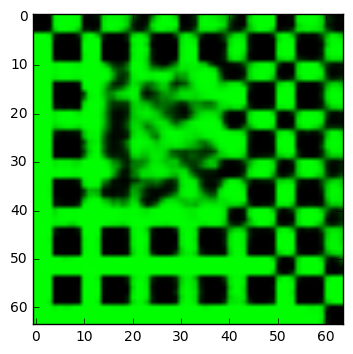

In [59]:
out_image = (out * 255).astype(np.uint8)
plt.imshow(out_image)

categorical crossentropy 
https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [114]:

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [151]:
# fix random seed for reproducibility
seed = 5
numpy.random.seed(seed)

In [152]:
# load dataset
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]


In [153]:
len(Y)

150

In [154]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [155]:
dummy_y.shape

(150, 3)

In [156]:
ids = np.arange(len(Y))
np.random.shuffle(ids)

train_ids = ids[0:140]
test_ids = ids[140:len(Y)]

train_X = X[train_ids, ...]
train_Y = dummy_y[train_ids, ...]
test_X = X[test_ids, ...]
test_Y = dummy_y[test_ids, ...]

In [157]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((140, 4), (140, 3), (10, 4), (10, 3))

In [158]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [159]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.fit(x = train_X, y = train_Y, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
140/140 [==============================] - 1s 9ms/step - loss: 0.7962 - acc: 0.6143
Epoch 2/100
140/140 [==============================] - 0s 2ms/step - loss: 0.6536 - acc: 0.6643
Epoch 3/100
140/140 [==============================] - 0s 2ms/step - loss: 0.5568 - acc: 0.7857
Epoch 4/100
140/140 [==============================] - 0s 1ms/step - loss: nan - acc: 0.5429
Epoch 5/100
140/140 [==============================] - 0s 1ms/step - loss: nan - acc: 0.3357
Epoch 6/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 8/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 9/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 10/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 11/100
140/140 [==============================] - 0s 2

In [162]:
score = model.evaluate(test_X, test_Y)

10/10 [==============================] - 0s 22ms/step


In [163]:
score

[nan, 0.30000001192092896]